In [ ]:
from pathlib import Path

# Get the path to the project directory
project_path = Path(__file__).resolve().parents[1] if '__file__' in globals() else Path().resolve().parent

# Now you can reference the data folder like this:
dataset_path = project_path / "data"

In [3]:
import pandas as pd

data = pd.read_csv(dataset_path+"/weather.csv")
df = pd.DataFrame(data)
df.head(10)

,Unnamed: 0,name,id,address,date,GHI,latitude,longitude,time,surface_pressure,...,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation,timezone,sunrise,sunset
0,0,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 10:45:00,0.970,51.10499,-114.250011,2017-11-21 10:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 11:45:00,23.927,51.10499,-114.250011,2017-11-21 11:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 12:45:00,69.659,51.10499,-114.250011,2017-11-21 12:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 13:45:00,59.172,51.10499,-114.250011,2017-11-21 13:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 14:45:00,18.061,51.10499,-114.250011,2017-11-21 14:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 08:45:00,12.285,51.10499,-114.250011,2017-11-22 08:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 09:00:00,20.961,51.10499,-114.250011,2017-11-22 09:00:00,884.2,...,274.0,71.0,19.9,6.5,0.0,0.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
7,7,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 09:45:00,42.792,51.10499,-114.250011,2017-11-22 09:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 10:00:00,50.230,51.10499,-114.250011,2017-11-22 10:00:00,883.8,...,201.0,89.0,11.9,3.1,0.0,0.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
9,9,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 10:45:00,166.551,51.10499,-114.250011,2017-11-22 10:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

#### Data analysis and processing

In [4]:
df.shape

(24869, 22)

In [5]:
df.isnull().mean()*100 # check missing data

,0
Unnamed: 0,0.00000
name,0.00000
id,0.00000
address,0.00000
date,0.00000
GHI,0.00000
latitude,0.00000
longitude,0.00000
time,0.00000
surface_pressure,1.35108


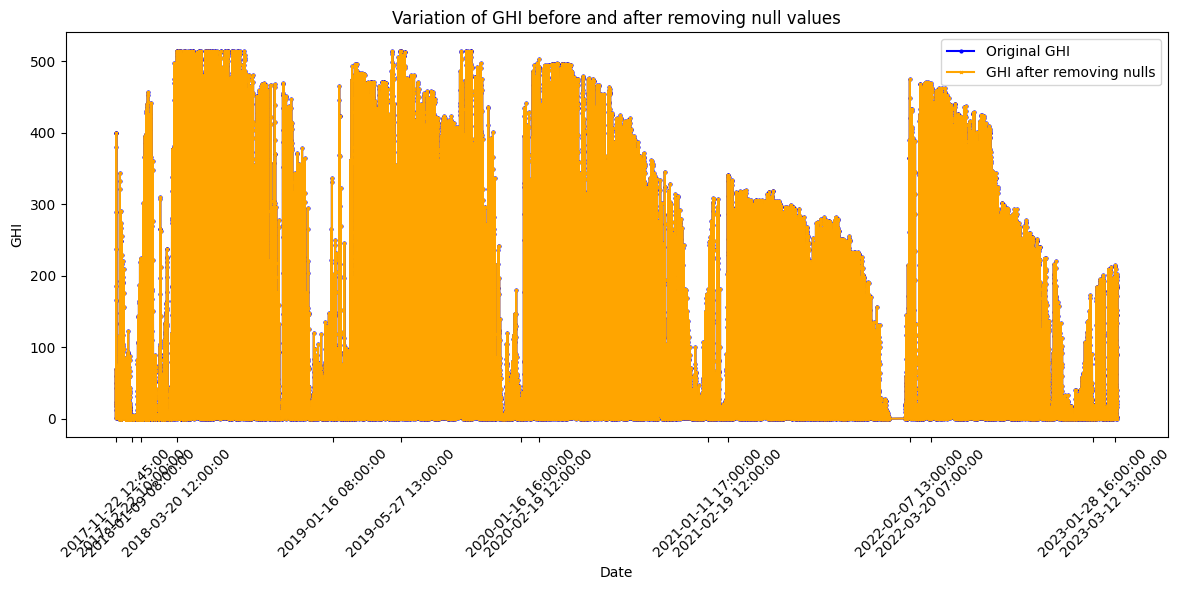

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


df_new = df.copy()

# Convert the 'date' column to DatetimeIndex before setting it as index
df_new['date'] = pd.to_datetime(df_new['date'])  # Convert to DatetimeIndex
df_new.set_index('date', inplace=True)

ghi_column = 'GHI'  # Replace with your actual GHI column name

# Identify peak (max) and bottom (min) GHI values for each year
df_new['Year'] = df_new.index.year  # Extract the year from the index
peak_dates = df_new.loc[df_new.groupby('Year')[ghi_column].idxmax()].index
bottom_dates = df_new.loc[df_new.groupby('Year')[ghi_column].idxmin()].index

# Combine peak and bottom dates
significant_dates = sorted(peak_dates.union(bottom_dates))

# Convert significant_dates to DatetimeIndex to use strftime
significant_dates = pd.DatetimeIndex(significant_dates)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original GHI data
ax.plot(df_new.index, df_new[ghi_column], label='Original GHI', marker='o', markersize=2, linestyle='-', color='blue')

# Remove rows with null values and plot the cleaned GHI data
df_cleaned = df_new.dropna(subset=[ghi_column])
ax.plot(df_cleaned.index, df_cleaned[ghi_column], label='GHI after removing nulls', marker='x', markersize=2, linestyle='-', color='orange')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('GHI')
ax.set_title('Variation of GHI before and after removing null values')
ax.legend()

# Set only the significant dates as x-axis ticks
ax.set_xticks(significant_dates)
ax.set_xticklabels(significant_dates.strftime('%Y-%m-%d %H:%M:%S'), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Removing nan values won't affect the distribution of the GHI

In [7]:
# Delete missing data

rows_before = df.shape[0]
df.dropna(inplace=True)
rows_after = df.shape[0]
rows_deleted = rows_before - rows_after
percentage_deleted = (rows_deleted / rows_before) * 100
print(f"Percentage of data deleted: {percentage_deleted:.2f}%")

Percentage of data deleted: 1.35%


In [8]:
df.dtypes # check the type of each attribut

,0
Unnamed: 0,int64
name,object
id,int64
address,object
date,object
GHI,float64
latitude,float64
longitude,float64
time,object
surface_pressure,float64


In [9]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['name', 'address', 'date', 'time', 'timezone', 'sunrise', 'sunset'], dtype='object')

In [10]:
# Display value counts for each object column to verify the content and the variance of the categories
for column in object_columns:
  print(f"\nValue counts for {column}:")
  print(df[column].value_counts())


Value counts for name:
name
Bearspaw Water Treatment Plant    24533
Name: count, dtype: int64

Value counts for address:
address
11444 Bearspaw Dam RD NW    24533
Name: count, dtype: int64

Value counts for date:
date
2017-11-22 09:00:00    1
2021-05-11 16:00:00    1
2021-05-12 08:00:00    1
2021-05-12 07:00:00    1
2021-05-12 06:00:00    1
                      ..
2019-07-14 10:00:00    1
2019-07-14 09:00:00    1
2019-07-14 08:00:00    1
2019-07-14 07:00:00    1
2023-03-16 19:00:00    1
Name: count, Length: 24533, dtype: int64

Value counts for time:
time
2017-11-22 09:00:00    1
2021-05-11 16:00:00    1
2021-05-12 08:00:00    1
2021-05-12 07:00:00    1
2021-05-12 06:00:00    1
                      ..
2019-07-14 10:00:00    1
2019-07-14 09:00:00    1
2019-07-14 08:00:00    1
2019-07-14 07:00:00    1
2023-03-16 19:00:00    1
Name: count, Length: 24533, dtype: int64

Value counts for timezone:
timezone
MDT    24533
Name: count, dtype: int64

Value counts for sunrise:
sunrise
2018-01-0

In [11]:
from datetime import datetime

# Convert 'time', 'date', 'sunset', 'sunrise' columns to datetime objects
for column in ['time', 'date', 'sunset', 'sunrise']:
  try:
    df[column] = pd.to_datetime(df[column])
  except ValueError:
    print(f"Error converting {column} to datetime. Skipping.")

In [12]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,Unnamed: 0,id,date,GHI,latitude,longitude,time,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation,sunrise,sunset
count,24533.000000,24533.0,24533,24533.000000,2.453300e+04,2.453300e+04,24533,24533.000000,24533.00000,24533.000000,24533.000000,24533.000000,24533.000000,24533.000000,24533.000000,24533.000000,24533.0,24533,24533
mean,12599.792891,577650.0,2020-06-14 19:52:05.732686336,125.259374,5.110499e+01,-1.142500e+02,2020-06-14 19:52:05.732686336,889.788090,0.00953,44.476159,217.647006,57.719969,15.323095,6.488452,0.058872,43.129703,1088.0,2020-06-14 14:16:24.750336512,2020-06-15 03:01:45.580238848
min,6.000000,577650.0,2017-11-22 09:00:00,0.001000,5.110499e+01,-1.142500e+02,2017-11-22 09:00:00,858.900000,0.00000,-35.500000,1.000000,7.000000,1.600000,0.000000,0.000000,0.000000,1088.0,2017-11-22 09:05:00,2017-11-22 17:40:00
25%,6469.000000,577650.0,2019-02-26 13:00:00,10.025000,5.110499e+01,-1.142500e+02,2019-02-26 13:00:00,885.400000,0.00000,30.800000,133.000000,41.000000,10.500000,4.000000,0.000000,8.000000,1088.0,2019-02-26 08:27:00,2019-02-26 19:11:00
50%,12602.000000,577650.0,2020-06-12 19:00:00,63.712000,5.110499e+01,-1.142500e+02,2020-06-12 19:00:00,890.300000,0.00000,46.200000,260.000000,58.000000,14.300000,6.000000,0.000000,32.000000,1088.0,2020-06-12 05:21:00,2020-06-12 21:51:00
75%,18735.000000,577650.0,2021-09-18 12:00:00,213.931000,5.110499e+01,-1.142500e+02,2021-09-18 12:00:00,894.600000,0.00000,60.700000,298.000000,74.000000,19.000000,8.400000,0.000000,82.000000,1088.0,2021-09-18 07:17:00,2021-09-18 19:43:00
max,24868.000000,577650.0,2023-03-16 19:00:00,514.462000,5.110499e+01,-1.142500e+02,2023-03-16 19:00:00,912.200000,1.47000,98.600000,360.000000,100.000000,49.400000,24.900000,9.100000,100.000000,1088.0,2023-03-16 07:47:00,2023-03-16 19:42:00
std,7086.033131,0.0,NaN,139.237350,2.351944e-12,1.020360e-11,NaN,6.946267,0.05431,21.595540,99.618130,20.782527,6.640409,3.390723,0.297652,36.893743,0.0,NaN,NaN


In [13]:
# delete columns with std ~ 0  and columns with one category
columns_to_drop = ['Unnamed: 0', 'id', 'latitude', 'longitude', 'elevation', 'name', 'address', 'timezone']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [14]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
  print("Duplicate rows found:")
  print(duplicate_rows)
  # Delete duplicate rows (keeping the first occurrence)
  df.drop_duplicates(inplace=True)
else:
  print("No duplicate rows found.")


# Check for duplicate columns
duplicate_cols = df.columns[df.T.duplicated()]
if not duplicate_cols.empty:
  print("Duplicate columns found:")
  print(duplicate_cols)
  # Delete duplicate columns (keeping the first occurrence)
  # Step 1: Transpose the DataFrame, drop duplicates, and transpose back
  df_unique = df.T.drop_duplicates().T
  # Step 2: Reconvert to original types (if needed)
  df_unique = df_unique.astype({col: df[col].dtype for col in df_unique.columns})
  df = df_unique

else:
  print("No duplicate columns found.")


No duplicate rows found.
Duplicate columns found:
Index(['time'], dtype='object')


In [15]:
df.head(5)

,date,GHI,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,sunrise,sunset
6,2017-11-22 09:00:00,20.961,884.2,0.0,40.8,274.0,71.0,19.9,6.5,0.0,0.0,2017-11-22 09:05:00,2017-11-22 17:40:00
8,2017-11-22 10:00:00,50.230,883.8,0.0,31.9,201.0,89.0,11.9,3.1,0.0,0.0,2017-11-22 09:05:00,2017-11-22 17:40:00
10,2017-11-22 11:00:00,236.600,884.3,0.0,33.7,173.0,87.0,8.9,3.6,0.0,3.0,2017-11-22 09:05:00,2017-11-22 17:40:00
12,2017-11-22 12:00:00,399.535,884.3,0.0,36.5,124.0,84.0,8.3,4.0,0.0,2.0,2017-11-22 09:05:00,2017-11-22 17:40:00
14,2017-11-22 13:00:00,398.994,884.4,0.0,38.3,118.0,80.0,7.6,4.3,0.0,2.0,2017-11-22 09:05:00,2017-11-22 17:40:00


In [16]:
df.dtypes # check the type of each attribut

,0
date,datetime64[ns]
GHI,float64
surface_pressure,float64
snowfall,float64
temperature_2m,float64
winddirection_10m,float64
relativehumidity_2m,float64
windgusts_10m,float64
windspeed_10m,float64
precipitation,float64


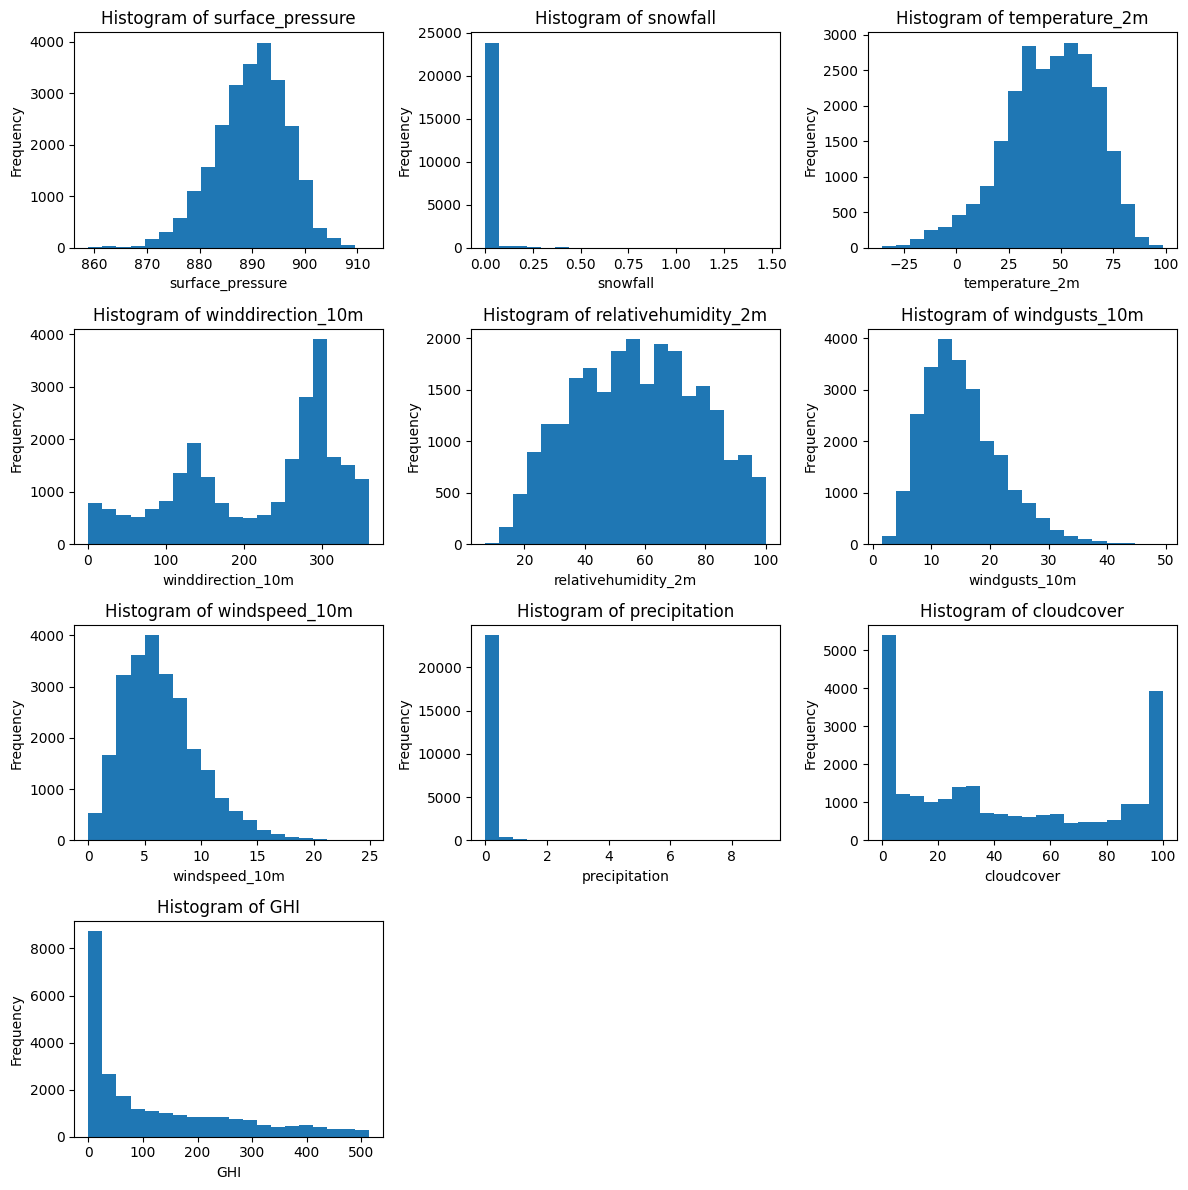

In [17]:
import matplotlib.pyplot as plt

# Create subplots for each continuous variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
axes = axes.flatten()

continuous_variables = ['surface_pressure', 'snowfall', 'temperature_2m',
                        'winddirection_10m', 'relativehumidity_2m', 'windgusts_10m',
                        'windspeed_10m', 'precipitation', 'cloudcover', 'GHI']


for i, variable in enumerate(continuous_variables):
  try:
    axes[i].hist(df[variable], bins=20)
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
  except KeyError:
    print(f"Column '{variable}' not found in DataFrame.")

# Remove any unused subplots
for i in range(len(continuous_variables), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

* surface_pressure et temperature_2m ainsi que relativehumidity_2m suivent une distribution normale légèrement penchée vers la droite.
* Pour windgust_10m, windspeed_10m, et GHI, la distribution est penchée vers la gauche.
* Pour precipitation et snowfall, la distribution est fortement penchée vers la gauche, avec une moyenne et une médiane égales à 0.
* Pour winddirection et cloudcover, on remarque une distribution très variable.

#### GHI distribution on time

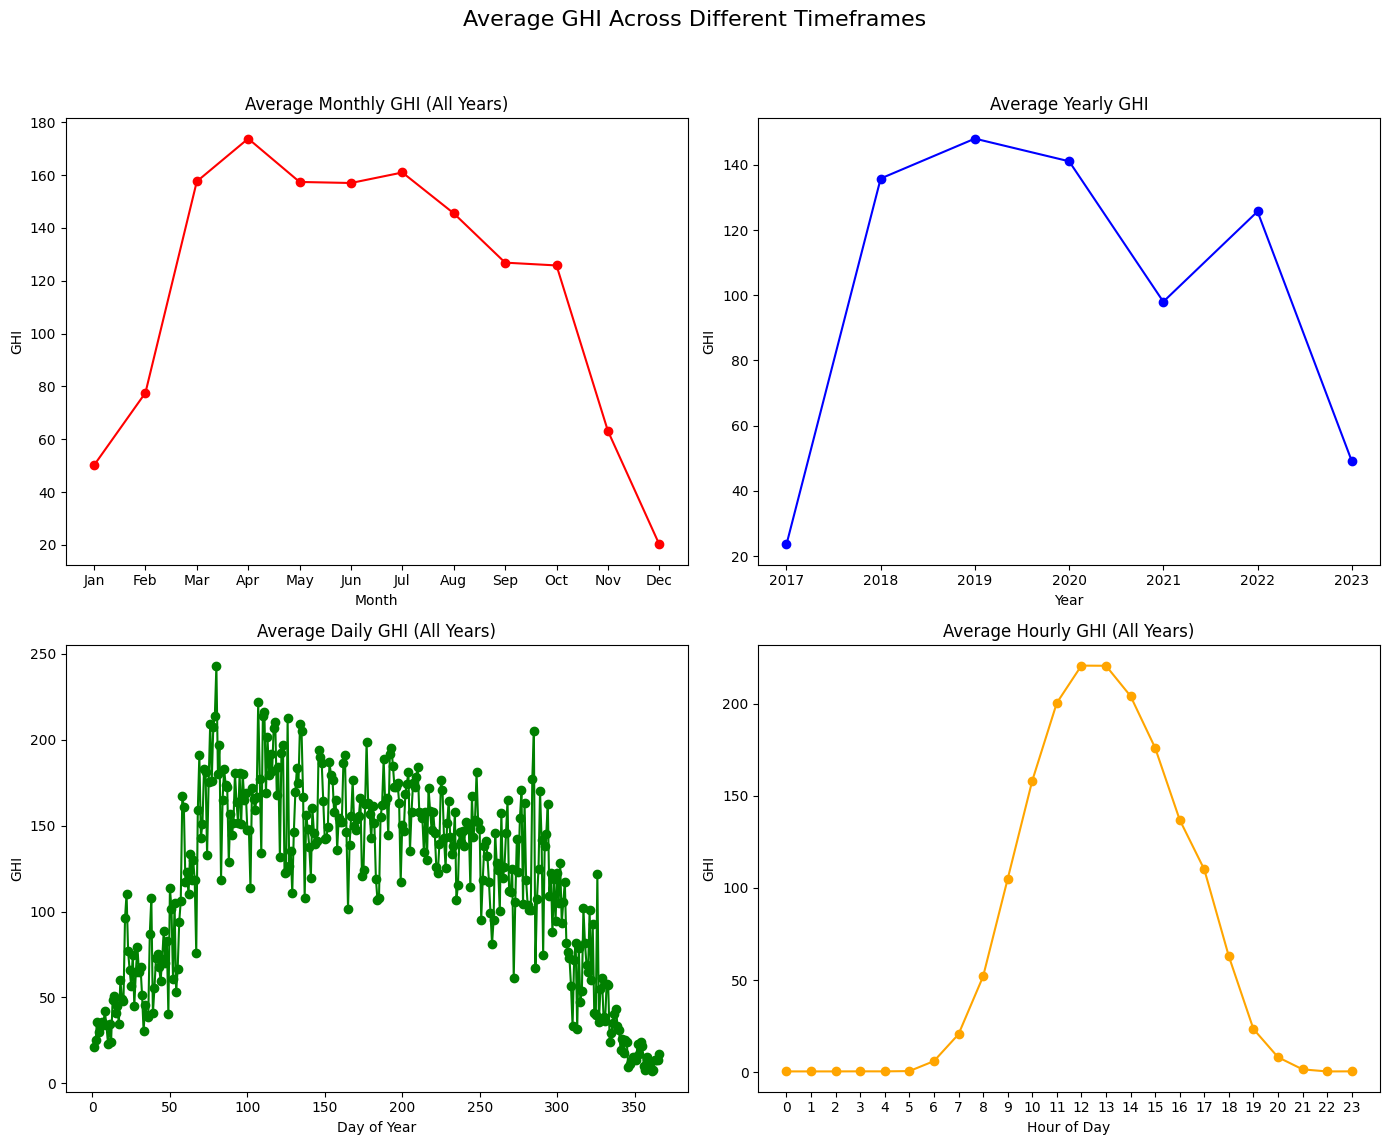

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


ghi_column = 'GHI'

# Calculate averages
monthly_mean_all_years = df_new[ghi_column].groupby(df_new.index.month).mean()   # Average for each month (across all years)
yearly_mean = df_new[ghi_column].groupby(df_new.index.year).mean()               # Average for each year
daily_mean_all_years = df_new[ghi_column].groupby(df_new.index.dayofyear).mean() # Average for each day of the year
hourly_mean_all_years = df_new[ghi_column].groupby(df_new.index.hour).mean()     # Average for each hour of the day (across all years)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Average GHI Across Different Timeframes', fontsize=16)

# Average GHI by month
axes[0, 0].plot(monthly_mean_all_years.index, monthly_mean_all_years, color='red', marker='o')
axes[0, 0].set_title('Average Monthly GHI (All Years)')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('GHI')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Average GHI by year
axes[0, 1].plot(yearly_mean.index, yearly_mean, color='blue', marker='o')
axes[0, 1].set_title('Average Yearly GHI')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('GHI')

# Average GHI by day of the year
axes[1, 0].plot(daily_mean_all_years.index, daily_mean_all_years, color='green', marker='o')
axes[1, 0].set_title('Average Daily GHI (All Years)')
axes[1, 0].set_xlabel('Day of Year')
axes[1, 0].set_ylabel('GHI')

# Average GHI by hour of the day
axes[1, 1].plot(hourly_mean_all_years.index, hourly_mean_all_years, color='orange', marker='o')
axes[1, 1].set_title('Average Hourly GHI (All Years)')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('GHI')
axes[1, 1].set_xticks(range(0, 24))
axes[1, 1].set_xticklabels(range(0, 24))



plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


### Data normalisation

In [19]:
# Select only numerical columns for normalization
numerical_cols = df.select_dtypes(include=['number']).columns

normalized_df = df.copy()
# Normalize numerical features using Min-Max scaling
for column in numerical_cols:
    normalized_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

normalized_df.head(5)

,date,GHI,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,sunrise,sunset
6,2017-11-22 09:00:00,0.040742,0.474672,0.0,0.568978,0.760446,0.688172,0.382845,0.261044,0.0,0.00,2017-11-22 09:05:00,2017-11-22 17:40:00
8,2017-11-22 10:00:00,0.097634,0.467167,0.0,0.502610,0.557103,0.881720,0.215481,0.124498,0.0,0.00,2017-11-22 09:05:00,2017-11-22 17:40:00
10,2017-11-22 11:00:00,0.459897,0.476548,0.0,0.516033,0.479109,0.860215,0.152720,0.144578,0.0,0.03,2017-11-22 09:05:00,2017-11-22 17:40:00
12,2017-11-22 12:00:00,0.776607,0.476548,0.0,0.536913,0.342618,0.827957,0.140167,0.160643,0.0,0.02,2017-11-22 09:05:00,2017-11-22 17:40:00
14,2017-11-22 13:00:00,0.775555,0.478424,0.0,0.550336,0.325905,0.784946,0.125523,0.172691,0.0,0.02,2017-11-22 09:05:00,2017-11-22 17:40:00


In [20]:
df.dtypes # check the type of each attribut

,0
date,datetime64[ns]
GHI,float64
surface_pressure,float64
snowfall,float64
temperature_2m,float64
winddirection_10m,float64
relativehumidity_2m,float64
windgusts_10m,float64
windspeed_10m,float64
precipitation,float64


#### Understanding relationship between features

<ipython-input-21-18734ac280a2>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = normalized_df.resample('M').mean()  # Monthly average


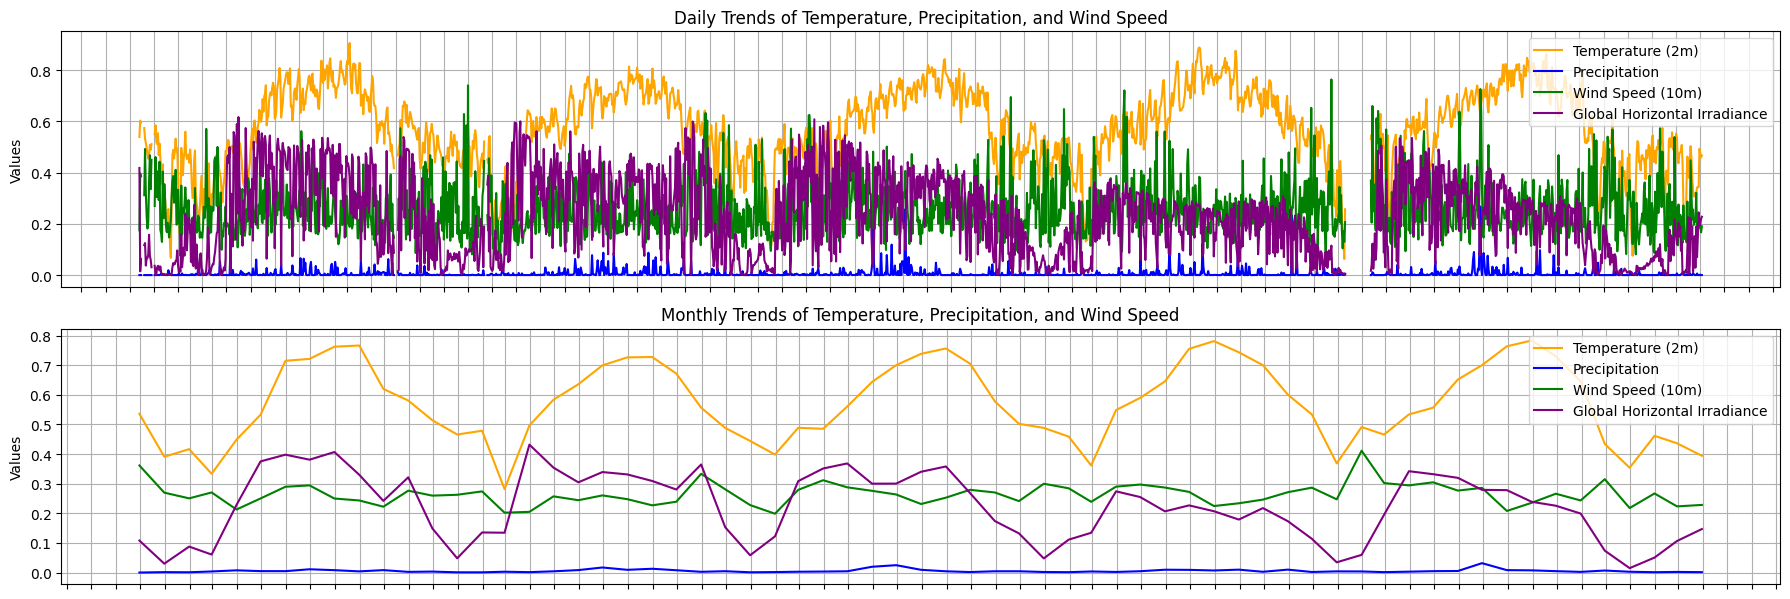

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set date as the index for easier resampling
normalized_df.set_index('date', inplace=True)

# Resampling the data
daily_data = normalized_df.resample('D').mean()  # Daily average
monthly_data = normalized_df.resample('M').mean()  # Monthly average

# Plotting
plt.figure(figsize=(18, 12))

# Daily trends
plt.subplot(4, 1, 1)
plt.plot(daily_data.index, daily_data['temperature_2m'], label='Temperature (2m)', color='orange')
plt.plot(daily_data.index, daily_data['precipitation'], label='Precipitation', color='blue')
plt.plot(daily_data.index, daily_data['windspeed_10m'], label='Wind Speed (10m)', color='green')
plt.plot(daily_data.index, daily_data['GHI'], label='Global Horizontal Irradiance', color='purple')
plt.title('Daily Trends of Temperature, Precipitation, and Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()

# Set x-axis major locator and formatter to show daily ticks
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show a tick every 30 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date as Year-Month-Day
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

# Monthly trends
plt.subplot(4, 1, 2)
plt.plot(monthly_data.index, monthly_data['temperature_2m'], label='Temperature (2m)', color='orange')
plt.plot(monthly_data.index, monthly_data['precipitation'], label='Precipitation', color='blue')
plt.plot(monthly_data.index, monthly_data['windspeed_10m'], label='Wind Speed (10m)', color='green')
plt.plot(monthly_data.index, monthly_data['GHI'], label='Global Horizontal Irradiance', color='purple')
plt.title('Monthly Trends of Temperature, Precipitation, and Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()

# Set x-axis major locator and formatter for monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show a tick for each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format date as Year-Month
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability


# Show the plots
plt.tight_layout()
plt.show()


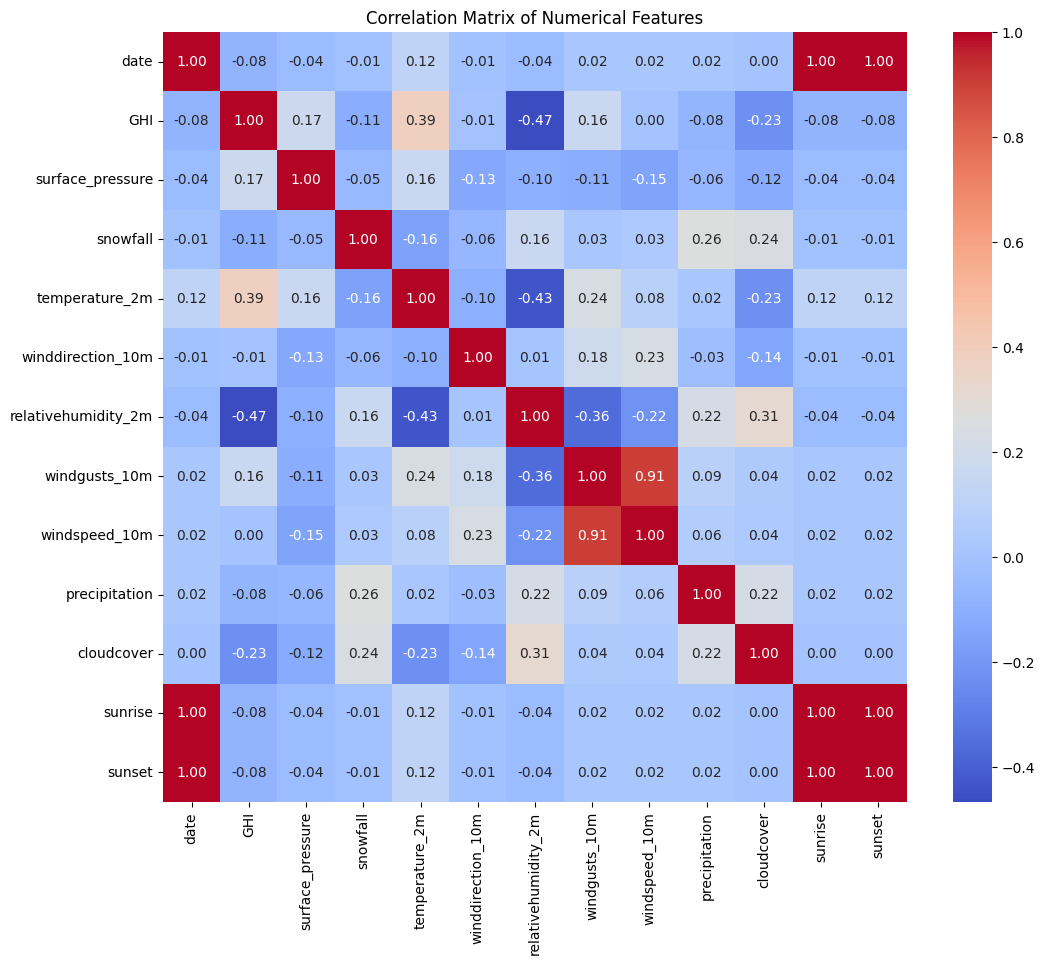

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

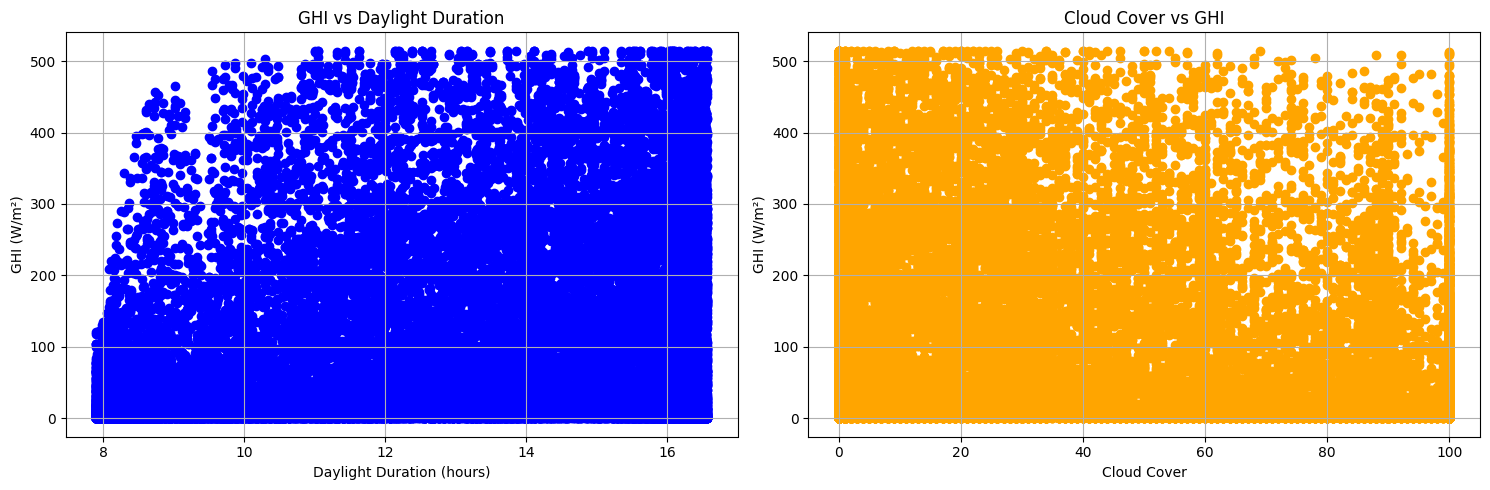

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daylight duration (in hours)
df['daylight_duration'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Analyze GHI vs. Daylight Duration
axs[0].scatter(df['daylight_duration'], df['GHI'], color='blue')
axs[0].set_title('GHI vs Daylight Duration')
axs[0].set_xlabel('Daylight Duration (hours)')
axs[0].set_ylabel('GHI (W/m²)')
axs[0].grid()

# Analyze Cloud Cover vs. GHI
axs[1].scatter(df['cloudcover'], df['GHI'], color='orange')
axs[1].set_title('Cloud Cover vs GHI')
axs[1].set_xlabel('Cloud Cover')
axs[1].set_ylabel('GHI (W/m²)')
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


### Sampling

In [24]:
columns_to_drop = ['sunrise', 'sunset', 'windspeed_10m', 'winddirection_10m']
df = df.drop(columns=columns_to_drop, errors='ignore')


In [25]:
# Shuffle and split into train, validation, and test sets
train_ratio = 0.8
test_ratio = 0.2

# Time series split
df_sorted = df.sort_values('date')  # Ensure data is sorted by date
train_size = int(len(df_sorted) * train_ratio)
test_size = len(df_sorted) - train_size

train_df_time = df_sorted[:train_size]
test_df_time = df_sorted[train_size:]




In [26]:
train_df_time

,date,GHI,surface_pressure,snowfall,temperature_2m,relativehumidity_2m,windgusts_10m,precipitation,cloudcover,daylight_duration
6,2017-11-22 09:00:00,20.961,884.2,0.00,40.8,71.0,19.9,0.0,0.0,8.583333
8,2017-11-22 10:00:00,50.230,883.8,0.00,31.9,89.0,11.9,0.0,0.0,8.583333
10,2017-11-22 11:00:00,236.600,884.3,0.00,33.7,87.0,8.9,0.0,3.0,8.583333
12,2017-11-22 12:00:00,399.535,884.3,0.00,36.5,84.0,8.3,0.0,2.0,8.583333
14,2017-11-22 13:00:00,398.994,884.4,0.00,38.3,80.0,7.6,0.0,2.0,8.583333
...,...,...,...,...,...,...,...,...,...,...
19957,2022-02-17 14:00:00,314.447,883.2,0.00,38.6,57.0,29.3,0.0,60.0,10.183333
19958,2022-02-17 15:00:00,286.540,883.2,0.00,40.6,53.0,27.5,0.0,55.0,10.183333
19959,2022-02-17 16:00:00,193.519,883.5,0.00,41.2,51.0,26.4,0.0,16.0,10.183333
19960,2022-02-17 17:00:00,16.931,883.8,0.00,40.9,52.0,27.7,0.0,19.0,10.183333


### Machine learning models

**Without feature selection**

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from scipy.stats import pearsonr
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


class PipelinePredictSalePrice:

    def __init__(self, train_df, test_df):
        # Convert 'date' to numerical features (e.g., year, month, day)
        train_df = self.extract_date_features(train_df)
        test_df = self.extract_date_features(test_df)

        self.X_train = train_df.drop('GHI', axis=1)
        self.y_train = train_df['GHI']
        self.X_test = test_df.drop('GHI', axis=1)
        self.y_test = test_df['GHI']

        # List of models to test
        self.models = {
            'Random Forest': RandomForestRegressor(),
            'Gradient Boosting': GradientBoostingRegressor(),
            'XGBoost': XGBRegressor(),
            'LightGBM': LGBMRegressor(),
        }


    def train_test(self):
        results = {}
        predictions = {}

        tscv = TimeSeriesSplit(n_splits=5)  # Specify number of splits

        for model_name, model in self.models.items():
            pipeline = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler()),
                ('model', model)
            ])

            mse_scores = []
            mae_scores = []
            r2_scores = []

            # Time-series aware cross-validation
            for train_index, test_index in tscv.split(self.X_train):
                X_train_fold, X_test_fold = self.X_train.iloc[train_index], self.X_train.iloc[test_index]
                y_train_fold, y_test_fold = self.y_train.iloc[train_index], self.y_train.iloc[test_index]

                pipeline.fit(X_train_fold, y_train_fold)
                y_pred_fold = pipeline.predict(X_test_fold)

                # Calculate and store metrics for this fold
                mse_scores.append(mean_squared_error(y_test_fold, y_pred_fold))
                mae_scores.append(mean_absolute_error(y_test_fold, y_pred_fold))
                r2_scores.append(r2_score(y_test_fold, y_pred_fold))

            # Calculate average metrics across folds
            results[model_name] = {
                'Cross-Validated MSE': np.mean(mse_scores),
                'Cross-Validated MAE': np.mean(mae_scores),
                'Cross-Validated R2': np.mean(r2_scores),
                'R2 95% CI' : self.bootstrap_confidence_interval(self.y_test, pipeline.predict(self.X_test), r2_score),
                'MSE 95% CI' : self.bootstrap_confidence_interval(self.y_test, pipeline.predict(self.X_test), mean_squared_error),
                'MAE 95% CI' : self.bootstrap_confidence_interval(self.y_test, pipeline.predict(self.X_test), mean_absolute_error)
            }

            # Fit final model and get predictions on the full test set
            pipeline.fit(self.X_train, self.y_train)
            predictions[model_name] = pipeline.predict(self.X_test)

        return predictions, results


    def bootstrap_confidence_interval(self, y_true, y_pred, metric_func, n_bootstraps=1000, alpha=0.05):
        """Calculate the bootstrap confidence interval for a given metric."""
        bootstrapped_scores = []
        for _ in range(n_bootstraps):
            # Resample with replacement
            indices = resample(range(len(y_true)))
            if len(set(indices)) > 1:  # Ensure resample is valid
                score = metric_func(np.array(y_true)[indices], np.array(y_pred)[indices])
                bootstrapped_scores.append(score)

        # Compute the confidence interval
        lower_bound = np.percentile(bootstrapped_scores, 100 * alpha / 2)
        upper_bound = np.percentile(bootstrapped_scores, 100 * (1 - alpha / 2))
        return (lower_bound, upper_bound)

    def extract_date_features(self, df):
        """Extracts numerical features from the 'date' column."""
        datetime_columns = ['date', 'sunset', 'sunrise']
        # Ensure the column is in datetime format
        for datetime_column in datetime_columns:
            if datetime_column in df.columns:
                df[datetime_column] = pd.to_datetime(df[datetime_column])
                # Extract features
                df[f'{datetime_column}_year'] = df[datetime_column].dt.year
                df[f'{datetime_column}_month'] = df[datetime_column].dt.month
                df[f'{datetime_column}_day'] = df[datetime_column].dt.day
                df[f'{datetime_column}_hour'] = df[datetime_column].dt.hour
                df[f'{datetime_column}_minute'] = df[datetime_column].dt.minute
                df.drop(columns=[datetime_column], inplace=True)
        return df

    def plot_error_metrics(self, results):
        model_names = list(results.keys())
        mse_values = [results[name]['Cross-Validated MSE'] for name in model_names]
        mae_values = [results[name]['Cross-Validated MAE'] for name in model_names]
        r2_values = [results[name]['Cross-Validated R2'] for name in model_names]

        # Plot Test MSE and MAE
        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)
        plt.barh(model_names, mse_values, color='skyblue')
        plt.xlabel('Mean Squared Error')
        plt.title('Model Comparison - Test MSE')

        plt.subplot(2, 2, 2)
        plt.barh(model_names, mae_values, color='lightcoral')
        plt.xlabel('Mean Absolute Error')
        plt.title('Model Comparison - Test MAE')

        plt.subplot(2, 2, 3)
        plt.barh(model_names, r2_values, color='lightgreen')
        plt.xlabel('R² Score')
        plt.title('Model Comparison - Test R²')

        plt.tight_layout()
        plt.show()

    def plot_results(self, predictions):
        num_models = len(predictions)
        fig, axes = plt.subplots(nrows=2, ncols=(num_models + 1) // 2, figsize=(15, 10))
        axes = axes.flatten()

        for idx, (model_name, y_pred) in enumerate(predictions.items()):
            axes[idx].scatter(self.y_test, y_pred, alpha=0.5)
            axes[idx].plot([min(self.y_test), max(self.y_test)], [min(self.y_test), max(self.y_test)], 'k--', lw=2)
            axes[idx].set_title(f'{model_name}')
            axes[idx].set_xlabel('Actual GHI')
            axes[idx].set_ylabel('Predicted GHI')
            axes[idx].grid(True)

        plt.tight_layout()
        plt.show()






/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [28]:
launch_pipeline = PipelinePredictSalePrice(train_df_time, test_df_time)
predictions, results= launch_pipeline.train_test()

<ipython-input-27-92d650d82153>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[datetime_column] = pd.to_datetime(df[datetime_column])
<ipython-input-27-92d650d82153>:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{datetime_column}_year'] = df[datetime_column].dt.year
<ipython-input-27-92d650d82153>:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 3271, number of used features: 12
[LightGBM] [Info] Start training from score 111.810110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 6542, number of used features: 12
[LightGBM] [Info] Start training from score 126.878095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

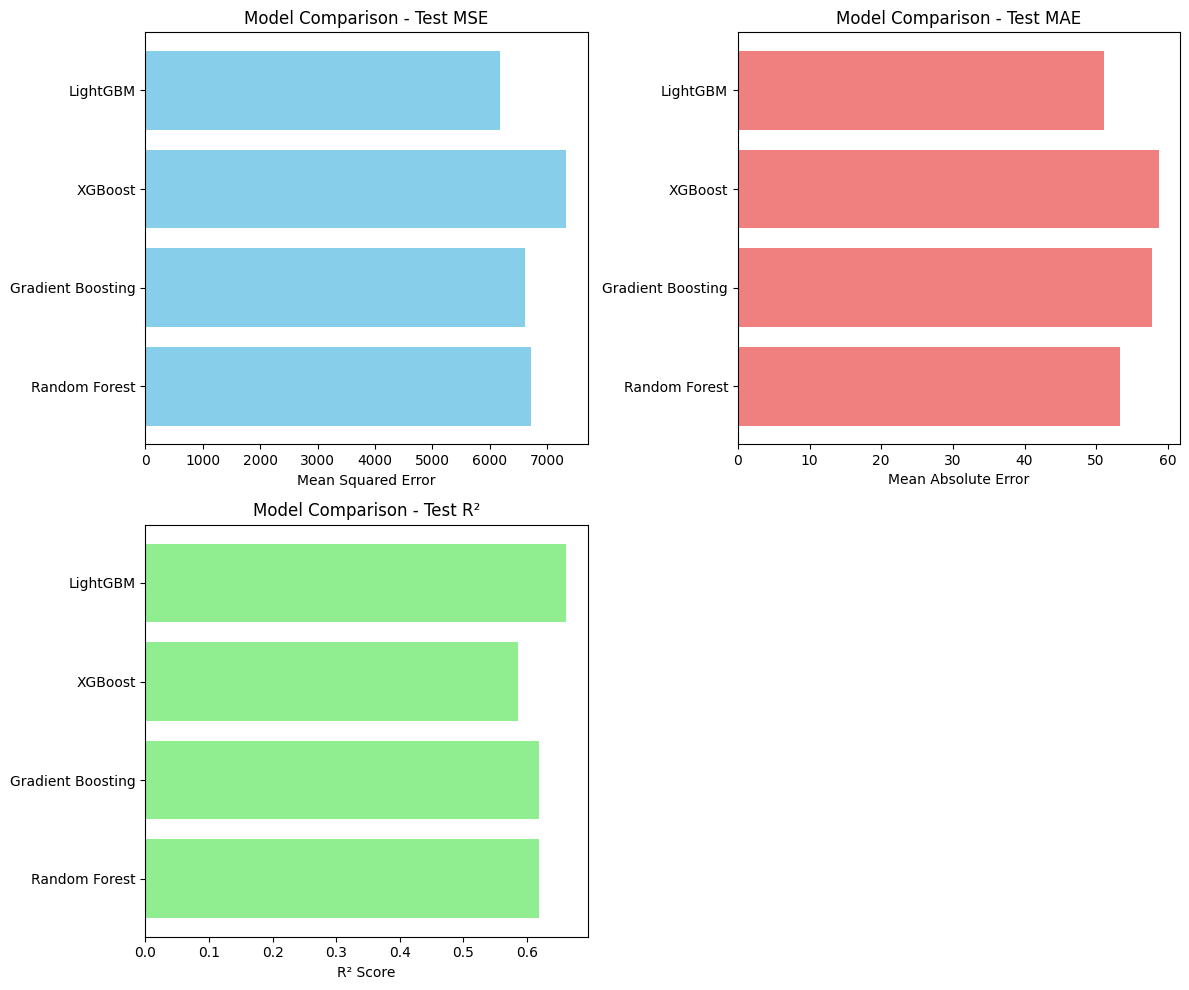

In [29]:
launch_pipeline.plot_error_metrics(results)

In [30]:
for model_name, metrics  in results.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validated MSE: {metrics['Cross-Validated MSE']:.4f}")
    print(f"Cross-Validated MAE: {metrics['Cross-Validated MAE']:.4f}")
    print(f"Cross-Validated R2: {metrics['Cross-Validated R2']:.4f}")
    print(f"R2 95% CI: {metrics['R2 95% CI']}")
    print(f"MSE 95% CI: {metrics['MSE 95% CI']}")
    print(f"MAE 95% CI: {metrics['MAE 95% CI']}")
    print('-' * 30)


Model: Random Forest
Cross-Validated MSE: 6712.8515
Cross-Validated MAE: 53.3980
Cross-Validated R2: 0.6190
R2 95% CI: (0.6140222077612151, 0.6470029665115159)
MSE 95% CI: (5258.541976777909, 5876.880975136624)
MAE 95% CI: (47.79295556235989, 50.88755517857143)
------------------------------
Model: Gradient Boosting
Cross-Validated MSE: 6610.9261
Cross-Validated MAE: 57.7552
Cross-Validated R2: 0.6193
R2 95% CI: (0.6669108883653381, 0.6958903092929416)
MSE 95% CI: (4552.7088127467305, 5093.57171352704)
MAE 95% CI: (49.468592296187275, 52.02134540148367)
------------------------------
Model: XGBoost
Cross-Validated MSE: 7338.9614
Cross-Validated MAE: 58.7661
Cross-Validated R2: 0.5860
R2 95% CI: (0.6308758415901834, 0.6641895721777277)
MSE 95% CI: (4995.43048956335, 5651.8348621001205)
MAE 95% CI: (48.559634945387884, 51.64457624100497)
------------------------------
Model: LightGBM
Cross-Validated MSE: 6175.0613
Cross-Validated MAE: 51.0301
Cross-Validated R2: 0.6620
R2 95% CI: (0.6684

In [31]:
def extract_date_features(df):
    """Extracts numerical features from the 'date' column."""
    datetime_columns = ['date', 'sunset', 'sunrise']
    # Ensure the column is in datetime format
    for datetime_column in datetime_columns:
      if datetime_column in df.columns:
        df[datetime_column] = pd.to_datetime(df[datetime_column])
        # Extract features
        df[f'{datetime_column}_year'] = df[datetime_column].dt.year
        df[f'{datetime_column}_month'] = df[datetime_column].dt.month
        df[f'{datetime_column}_day'] = df[datetime_column].dt.day
        df[f'{datetime_column}_hour'] = df[datetime_column].dt.hour
        df[f'{datetime_column}_minute'] = df[datetime_column].dt.minute

        df.drop(columns=[datetime_column], inplace=True)

    return df


train_df = extract_date_features(train_df_time)
test_df = extract_date_features(test_df_time)

X_train = train_df.drop('GHI', axis=1)
y_train = train_df['GHI']
X_test = test_df.drop('GHI', axis=1)
y_test = test_df['GHI']


In [32]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.utils import resample
from lightgbm import LGBMRegressor

# Function to calculate bootstrap confidence intervals
def bootstrap_confidence_interval(y_true, y_pred, metric_func, n_bootstraps=1000, alpha=0.05):
    bootstrapped_scores = []
    for _ in range(n_bootstraps):
        # Resample with replacement
        indices = resample(range(len(y_true)))
        if len(set(indices)) > 1:  # Ensure resample is valid
            score = metric_func(np.array(y_true)[indices], np.array(y_pred)[indices])
            bootstrapped_scores.append(score)
    # Compute the confidence interval
    lower_bound = np.percentile(bootstrapped_scores, 100 * alpha / 2)
    upper_bound = np.percentile(bootstrapped_scores, 100 * (1 - alpha / 2))
    return (lower_bound, upper_bound)

# Function to perform GridSearchCV for LightGBM model
def grid_search_lgbm(X_train, y_train, X_test, y_test):
    # Define the model
    model = LGBMRegressor()

    # Set the parameters grid for tuning

    param_grid = {
        'model__n_estimators': [100, 200, 300],  # Added 'model__' prefix
        'model__learning_rate': [0.01, 0.05, 0.1],  # Added 'model__' prefix
        'model__num_leaves': [31, 50, 70],  # Added 'model__' prefix
        'model__max_depth': [10, 20, 30],  # Added 'model__' prefix
        'model__min_child_samples': [10, 20],  # Added 'model__' prefix
    }

    # Create a pipeline with imputation, scaling, and model
    pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Set up TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # GridSearchCV setup with TimeSeriesSplit
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error',  # Using negative MSE for model selection
        n_jobs=-1,
        verbose=1
    )


    # Fit the model
    grid_search.fit(X_train, y_train)

    # Best model after GridSearchCV
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate confidence intervals for the metrics
    mse_conf_int = bootstrap_confidence_interval(y_test, y_pred, mean_squared_error)
    mae_conf_int = bootstrap_confidence_interval(y_test, y_pred, mean_absolute_error)
    r2_conf_int = bootstrap_confidence_interval(y_test, y_pred, r2_score)

    # Print the results
    print("Best Parameters from Grid Search:")
    print(grid_search.best_params_)
    print("\nPerformance Metrics on the Test Set:")
    print(f"Test MSE: {mse} | 95% CI: {mse_conf_int}")
    print(f"Test MAE: {mae} | 95% CI: {mae_conf_int}")
    print(f"Test R²: {r2} | 95% CI: {r2_conf_int}")

    return best_model, grid_search.best_params_, mse, mae, r2, mse_conf_int, mae_conf_int, r2_conf_int

# Example Usage
# Assuming you have train/test data already prepared
# X_train, X_test, y_train, y_test = ...

best_model, best_params, mse, mae, r2, mse_ci, mae_ci, r2_ci = grid_search_lgbm(X_train, y_train, X_test, y_test)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 19626, number of used features: 12
[LightGBM] [Info] Start training from score 127.848095
Best Parameters from Grid Search:
{'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__min_child_samples': 20, 'model__n_estimators': 300, 'model__num_leaves': 31}

Performance Metrics on the Test Set:
Test MSE: 5198.303249877119 | 95% CI: (4897.9830877798695, 5505.998922597579)
Test MAE: 49.60630556771233 | 95% CI: (48.03858345113339, 51.05261692512307)
Test R²: 0.6562537485647303 | 95% CI: (0.6429561884872086, 0.6685098868454746)


In [33]:
best_model, best_params, mse, mae, r2, mse_ci, mae_ci, r2_ci

(Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                 ('model',
                  LGBMRegressor(learning_rate=0.01, max_depth=10,
                                n_estimators=300))]),
 {'model__learning_rate': 0.01,
  'model__max_depth': 10,
  'model__min_child_samples': 20,
  'model__n_estimators': 300,
  'model__num_leaves': 31},
 5198.303249877119,
 49.60630556771233,
 0.6562537485647303,
 (4897.9830877798695, 5505.998922597579),
 (48.03858345113339, 51.05261692512307),
 (0.6429561884872086, 0.6685098868454746))

In [34]:
# prompt: save the best model  in .pickle knowing that best_model is an output of a gridsearch

import pickle

# Assuming 'best_model' is your trained model from GridSearchCV

# Specify the file path where you want to save the model
model_filename = 'LightGBM_model.pickle'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {model_filename}")

Best model saved to LightGBM_model.pickle
